# **1 - Introdução:**

Em aprendizado de máquina nós estamos interessados em determinar a melhor hipótese (modelo) para um conjunto de dados de treinamento. Então, **uma maneira natural para encontrar a melhor hipótese é determinar a hipótese mais provável**. Assim, o Teorema de Bayes provê o cálculo das probabilidades das hipóteses para os dados observados:
- $P(h)$ denota a probabilidade de $h$ antes de observar os dados de treinamento (probabilidade a priori, baseando-se no conhecimento que temos sobre $h$ ser válido ou não);
- se não temos este conhecimento a priori atribuimos a mesma probabilidade para todas as hipóteses candidatas;
- $P(D)$ é a probabilidade de observar o conjunto de treinamento $D$;
- $P(D|h)$ é a probabilidade de observar os dados $D$ na hipótese $h$;
- $P(h|D)$ é a probabilidade posterior da hipótese $h$ após conhecer $D$.

Assim, o **Teorema de Bayes** é dado por:

$$P(h|D) = \frac {P(D|h) P(h)}{P(D)}$$

Assim, **informalmente**:

$$posterior = \frac{probabilidade * anterior}{evidência}$$

**Generalizando para $n$ temos:**

$$P(D) = \sum_{i=1}^{n} P(D|h_i).P(h_i)$$


Inicialmente, temos diversas hipóteses $h$ candidatas para o mesmo conjunto de dados $D$. Assim, queremos maximizar a hipótese mais provável (*Maximum a posteriori*)

$$h_{MAP} = argmax ~~P(h|D) = argmax ~~\frac{P(D|h) P(h)}{P(D)} = argmax~~ P(D|h)$$

devido a $P(D)$ ser constante para todas as hipóteses e por assumir que $P(h_i)$ são equiprováveis.


**Exemplo:**
- $\omega_1$ é a hipótese de um paciente estar doente;
- $\omega_2$ é a hipótese de um paciente não estar doente;
- $x$ é um atributo qualquer da base de dados $D$;
- supondo que o valor de $x$ para uma instância seja 10, esta instância possui maior probabilidade de pertencer à hipótese $\omega_1$ do que à hipótese $\omega_2$.
- $\theta_a$ estabelece um limiar para a separação das classes.

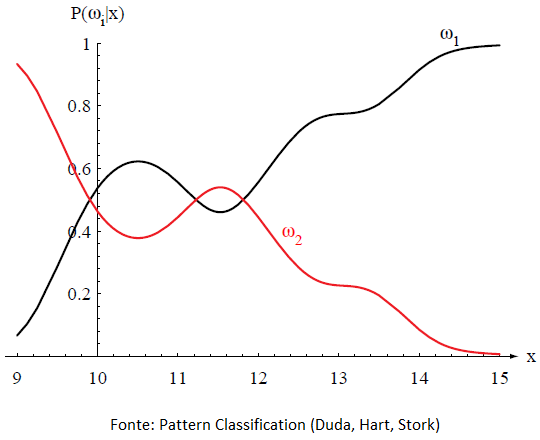

Ou seja, temos a **Regra de Decisão Bayesiana** para definir a melhor hipótese:

$$\omega_1 ~~if~~ P(\omega_1|x) > P(\omega_2|x); ~~caso~~contrário~~ \omega_2$$

Consequentemente, garantimos o **menor erro** e maximizamos a hipótese mais provável:

$$P(erro|x) = min [P(\omega_1|x),P(\omega_2|x)]$$

 


# **2 - Naive Bayes:**

O classificador Naive-Bayes considera que cada instância $x$ é formado por um conjunto de atributos $a$ e que a função alvo $f(x)$ assume uma das respectivas hipóteses $h_i$ das classes disponíveis.

Assim, para uma instância $x$ é atribuído a hipótese mais provável como rótulo de saída, em que:

$$h_{MAP} = argmax P(h_i|a_1,...,a_n)$$

Por meio do Teorema de Bayes obtemos:

$$h_{MAP} = argmax P(a_1,...,a_n|h_i)~P(h_i)$$

De forma geral:
- $P(h_i)$ é a frequência de cada hipótese ocorrida no conjunto de treinamento
- $P(a_1,...,a_n|h_i)$ muito complicado de obter pois não temos base para saber qual a probabilidade do conjunto de valores do atributos ocorrer para cada $h_i$.

Devido à essa dificuldade, assume-se que os atributos são condicionalmente independentes de $h_i$ (abordagem ingênua!!!). Consequentemente:

$$h_{NB} = argmax P(h_i) \prod P(a_j|h_i)$$

Assim, para cada hipótese $h$ calculamos apenas a probabilidade de cada atributo $a$. Isso torna o modelo menos complexo. Consequentemente, se os dados realmente forem condicionalmente independentes $h_{NB} = h_{MAP}$.

Outra característica é que não há necessidade de estimar os parâmetros, apenas a contagem de frequência para estabelecer as probabilidades.

**Algoritmo (dados de treinamento como entrada):**
- para cada classe $C_j$:
  - obter a probabilidade incondicional $P(C_j)$
  - para cada atributo $A_i$:
    - obter a probabilidade estimada $P(A_i|C_j)$

A saída do modelo proporciona:
- a probabilidade de cada classe no conjunto de dados de treino;
- a probabilidade condicional de cada atributo dada a classe;

**Exemplo:**

Dados de Treinamento:

Dia | Outlook | Temperature | Humidity | Wind | PlayTennis?
:---|:---|:---|:---|:---|:---
D1 | Sunny | Hot | High | Weak | No
D2 | Sunny | Hot | High | Strong | No
D3 | Overcast | Hot | High | Weak | Yes
D4 | Rain | Mild | High | Weak | Yes
D5 | Rain | Cool | Normal | Weak | Yes
D6 | Rain | Cool | Normal | Strong | No
D7 | Overcast | Cool | Normal | Strong | Yes
D8 | Sunny | Mild | High | Weak | No
D9 | Sunny | Cool | Normal | Weak | Yes
D10 | Rain | Mild | Normal | Weak | Yes
D11 | Sunny | Mild | Normal | Strong | Yes
D12 | Overcast | Mild | High | Strong | Yes
D13 | Overcast | Hot | Normal | Weak | Yes
D14 | Rain | Mild | High | Strong | No

Definição do Classificador Naive-Bayes:

$$h_{NB}= argmax ~P(h_i) \prod P(a_j|h_i)$$

Classificar (PlayTennis) a seguinte instância (Sunny, Cool, High, Strong):

$= P(Yes)~P(Sunny|Yes)~P(Cool|Yes)~P(High|Yes)~P(Strong|Yes) = \frac{9}{14} . \frac{2}{9} . \frac{3}{9} . \frac{3}{9} . \frac{3}{9} = 0.0053$

$= P(No)~~P(Sunny|No)~~~P(Cool|No)~~~P(High|No)~~~P(Strong|No) = \frac{5}{14} . \frac{3}{5} . \frac{1}{5} . \frac{2}{5} . \frac{3}{5} = 0.0206$

$h_{NB}= argmax \{0.0053, 0.0206\}$, ou seja, a saída é No

Como estamos utilizando frequência absoluta o somátorio não é 1. Se usarmos frequência relativa a soma passará a ser 1.

$\frac{0.0206}{0.0206+0.0053} = 0.795$ para No

$\frac{0.0053}{0.0206+0.0053} = 0.205$ para Yes

In [ ]:
# carregando os datasets
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

iris = load_iris()
X_iris = iris.data
Y_iris = iris.target
print("Conjunto de dados IRIS", X_iris.shape)
print("Conjunto de rótulos IRIS", Y_iris.shape)
print("Classes", np.unique(Y_iris))

wines = load_wine()
X_wines = wines.data
Y_wines = wines.target
print("\nConjunto de dados WINES", X_wines.shape)
print("Conjunto de rótulos WINES", Y_wines.shape)
print("Classes", np.unique(Y_wines))

Conjunto de dados IRIS (150, 4)
Conjunto de rótulos IRIS (150,)
Classes [0 1 2]

Conjunto de dados WINES (178, 13)
Conjunto de rótulos WINES (178,)
Classes [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# https://scikit-learn.org/stable/modules/naive_bayes.html

# dataset iris
xTrain, xTest, yTrain, yTest = train_test_split(X_iris, Y_iris, test_size=0.2)
nbIris = GaussianNB().fit(xTrain, yTrain)
predIris = nbIris.predict(xTest)

print('Acurácia IRIS com NB: %0.4f' % accuracy_score(predIris, yTest))
print('Probabilidade de cada classe:',nbIris.class_prior_)

# dataset wines
xTrain, xTest, yTrain, yTest = train_test_split(X_wines, Y_wines, test_size=0.2)
nbWines = GaussianNB().fit(xTrain, yTrain)
predWines = nbWines.predict(xTest)

print('\nAcurácia WINES com NB: %0.4f' % accuracy_score(predWines, yTest))
print('Probabilidade de cada classe:',nbWines.class_prior_)

Acurácia IRIS com NB: 0.9667
Probabilidade de cada classe: [0.34166667 0.35833333 0.3       ]

Acurácia IRIS com NB: 1.0000
Probabilidade de cada classe: [0.33802817 0.41549296 0.24647887]
